# Treine sua primeira rede neural: classificação básica 

Este tutorial treina um modelo de rede neural para classificação de imagens de roupas (e.g., tênis e camisetas).

Este é uma visão geral de um programa do TensorFlow.

O guia usa tf.keras, uma API alto-nível para construir e treinar modelos no TensorFlow.

In [79]:
# Tensorflow e keras 
import tensorflow as tf
from tensorflow import keras

# bibliotecas auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.16.1


## Importação da base de dados - FASHION MNIST

Neste tutorial é utilizada a base de dados [FASHION MNIST](https://github.com/zalandoresearch/fashion-mnist) que contém 70 mil imagens em escala de cinza em 10 categorias. 

As categorias são apresentadas abaixo:

<table>
  <tr>
    <th>Categorias</th>
  </tr>
  <tr>
    <td>Camiseta/Top</td>
  </tr>
  <tr>
    <td>Calça</td>
  </tr>
    <tr>
    <td>Suéter</td>
  </tr>
    <tr>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>Casaco</td>
  </tr>
    <tr>
    <td>Sandália</td>
  </tr>
    <tr>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>Tênis</td>
  </tr>
    <tr>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>Botina</td>
  </tr>
</table>

 As imagens mostram artigos de vestuário individuais com resolução baixa (28x28 pixels), conforme visto aqui:

<table>
  <tr><td>    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">   </td></tr>
  <tr><td align="left"> Imagem 1. <a>Amostras do Fashion MNIST</a>
</td></tr>
</table>

O código abaixo carrega as imagens apartir da *keras*.

In [80]:
fashion_mnist = keras.datasets.fashion_mnist

### Separando a base de dados em treino e teste.

In [81]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Ao carregar o dataset, são retornadas quatro matrizes *NumPy*:

 - As matrizes *train_images* e *train_labels* são o conjunto de treinamento.
 
 - As matrizes *test_images* e *test_labels* são o conjunto de teste.

As imagens são matrizes *NumPy* 28x28, sendo que os valores de pixel variam de 0 a 255. Os rótulos são uma matriz de números inteiros, que variam de 0 a 9.

Eles correspondem à classe de roupas que a imagem representa:

<table>
  <tr>
    <th>Rótulo</th>
    <th>Classe</th>
    <th>English Name</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camiseta/Top</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandália</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botim</td>
    <td>Ankle boot</td>
  </tr>
</table>

Conhecendo os rótulos, vamos armazena-los em uma lista para usar posteriormente.

In [82]:
class_names = ['T-Shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### Explorar os dados

Agora, vamos explorar o formato do dataset antes de treinar o modelo.

O código abaixo mostra que há 60 mil imagens no conjunto de treinamento, com cada imagem representada 
como pixels 28x28.

In [83]:
train_images.shape

(60000, 28, 28)

Verificar o tamanho (lenght) do conjunto de dados de treino.

In [84]:
len(train_images)

60000

Verificar o número de labels.

In [85]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Verificar o que shape, tamanho e número de labels na base de teste

In [86]:
print(f'O conjunto de teste tem o shape', test_images.shape)
print(f'O número de imagens do dataset de teste é ', len(test_images))
print(f'A labels do dataset de teste são ', set(test_labels))

O conjunto de teste tem o shape (10000, 28, 28)
O número de imagens do dataset de teste é  10000
A labels do dataset de teste são  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


### Pré-processamento

Os dados precisam ser pré-processados antes de treinar a Rede Neural. 

Esse passo é fundamental para o input dos dados que serão entregues a Rede Neural.

Se você conferir a primeira imagem no conjunto de treinamento, verá que os valores de pixel ficam no intervalo de 0 a 255:

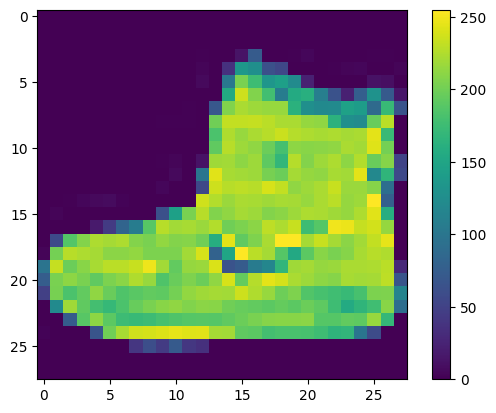

In [87]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Mude a escala desses valores para o intervalo de 0 a 1 antes de alimentá-los no modelo da rede neural. 

Para fazer isso,basta dividir os valores por 255. 

É importante que o *conjunto de treinamento* e o *conjunto de teste* sejam pré-processados da mesma forma:

In [88]:
train_images = train_images / 255

test_images = test_images / 255

Vamos ver como ficou!!!

**Repare que agora os eixos estão em escala de 0 e 1.**

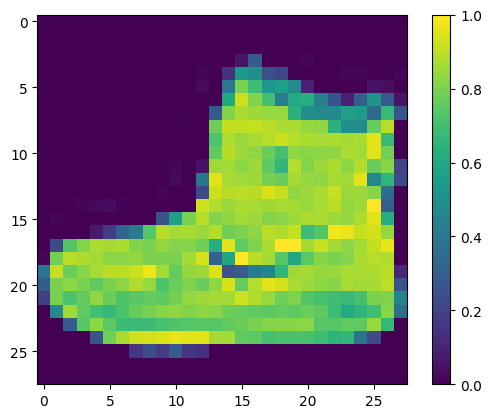

In [89]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

Agora vamos plotar as imagens com as labels do conjunto de treinamento para ver se está tudo correto.

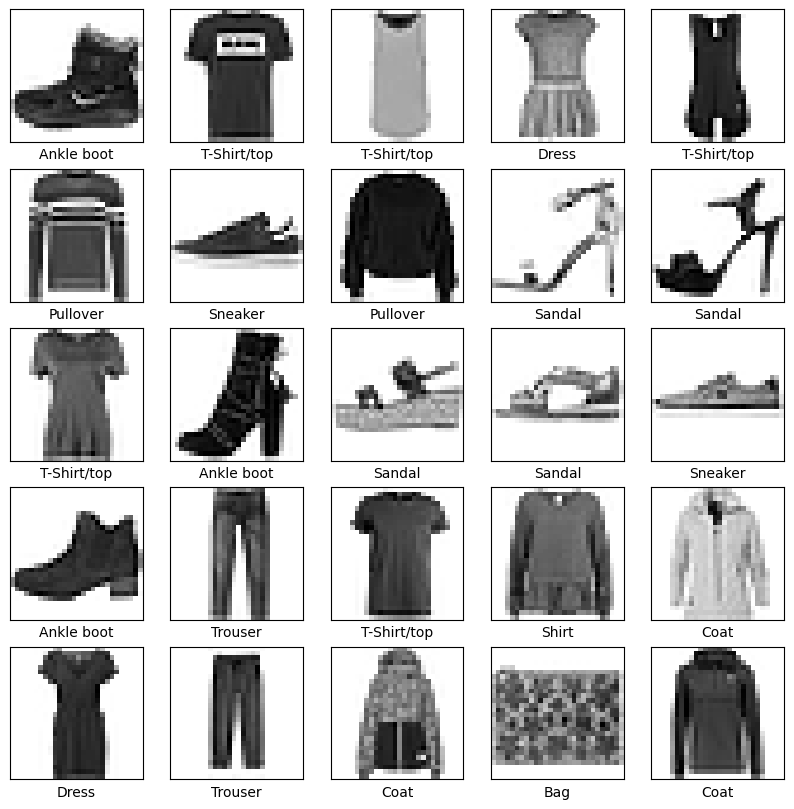

In [90]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

Parece adequado!!!
Agora vamos criar o **MODELO!!!**

### Modelo - REDE NEURAL

Para criar uma rede neural devemos configuras a sequencia de camadas e depois compilar o modelo.

#### Configuração das camadas

O bloco de construção básico de uma rede neural é a [*camada*](https://www.tensorflow.org/api_docs/python/tf/keras/layers).

As camadas extraem representações dos dados alimentados nela. Deste modo, espera-se que essas representações tenham um significado para o problema em questão. Vale destacar que existem vários tipos de camadas e isso deve ser cuidadosamente escolhido para que o modelo apresente bom desempenho.

A maioria dos aprendizados profundos consiste da combinação de camadas simples. A maioria das camadas, como `tf.keras.layers.Dense`, têm parâmetros que são aprendidos durante o treinamento.

In [91]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

c:\Users\saulo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


A primeira camada desta rede, `tf.keras.layers.Flatten`, transforma o formato das imagens de uma matriz bidimensional (de pixels 28x28) em uma matriz unidimensional (de 28 * 28 = 784 pixels). Pense nessa camada como pegar as linhas de pixels da imagem e enfileirá-las. Essa camada não tem parâmetros a aprender, ela somente reformata os dados.

Após os pixels serem achatados, a rede consiste de uma sequência de duas camadas `tf.keras.layers.Dense`, que são camadas neurais densamente conectadas, ou totalmente conectadas.

- A primeira camada `Dense` tem 128 nós (ou neurônios).
- A segunda (e última) camada retorna uma matriz de logits, com tamanho igual a 10. Cada nó contém uma pontuação que indica que a imagem atual pertence a uma das 10 classes.

Agora vamos compilar o modelo para, em seguida, treinar o modelo!

#### Compilação do modelo

Antes que o modelo fique pronto para o treinamento, é preciso fazer mais algumas configurações, que são adicionadas durante o passo de [*compilação*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) do modelo:

- [*Função de perda*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) — Mensura a exatidão do modelo durante o treinamento. Você vai querer minimizar essa função para "guiar" o modelo para a direção certa.
- [*Otimizador*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) — Indica como o modelo é atualizado com base nos dados que vê e em sua função de perda.
- [*Métricas*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) — Usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa  *acurácia*, a fração das imagens que estão classificadas corretamente.

In [92]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Treinar o modelo

O treinamento da modelo de rede neural requer os seguintes passos:

1. Alimentar os dados de treinamento no modelo. Neste exemplo, os dados de treinamento estão nas matrizes `train_images` e `train_labels`.
2. O modelo aprende a associar imagens e rótulos.
3. Você pede para o modelo fazer previsões sobre um conjunto de teste. Neste exemplo, é a matriz `test_images`.
4. Verifique se as previsões correspondem aos rótulos da matriz `test_labels`.

#### Alimentar e treinar o modelo

Para iniciar o treinamento, faça use o método [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), chamado de "fit" (adequar) porque ele faz o modelo "se adequar" aos dados de treinamento:

In [93]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7837 - loss: 0.6243
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8633 - loss: 0.3808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8763 - loss: 0.3410
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3093
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8915 - loss: 0.2938
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8957 - loss: 0.2846
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9021 - loss: 0.2643
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9027 - loss: 0.2608
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9065 - loss: 0.2503
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9111 - loss: 0.2392


À medida que o modelo é treinado, as métricas de perda (*Loss*) e exatidão (*Accuracy*) são exibidas. 

Repare que ao final do treinamento, a acurácia do modelo foi de 0,91 (91%) para os dados de treinamento.

#### Avaliar a precisão do modelo

Agora, vamos checar o desempenho do modelo no conjunto de dados de teste.

In [94]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTeste accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8808 - loss: 0.3374

Teste accuracy: 0.8808000087738037


Repare que a acurácia do modelo para o dataset de teste é um pouco menor do que para o dataset de treinamento. Essa discrepância entre a exatidão do treinamento e a exatidão do teste representa o *overfitting*. 

O *overfitting* acontece quando um modelo de aprendizado de máquina tem um desempenho inferior com entradas novas, nunca vistas anteriormente, em comparação aos dados de treinamento. Um modelo com overfitting "memoriza" o ruído e os detalhes do dataset de treinamento a ponto de impactar negativamente o desempenho do modelo para novos dados. 

Para mais informações, confira os links abaixo:

- [Demonstração do overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [Estratégias para evitar o overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Utilizando o modelo para fazer previsões

Com o modelo treinado, podemos usá-lo para fazer previsões sobre algumas imagens.

Anexe uma camada softmax para converter as saídas lineares do modelo ([logits](https://developers.google.com/machine-learning/glossary#logits)) em probabilidades, que são mais fáceis de interpretar.

Cumpre destacar que essa camada poderia ter sido incluída na configuramos a rede neural.

In [95]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Agora, vamos fazer predições e verificar o output.

In [96]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step


Vamos ver algumas previsões!!!

O código acima calcula a probabilidade de cada imagem pertencer a cada um dos 10 rótulos e retorna uma matriz com 10 números.  

Podemos ver qual rótulo tem o maior valor de confiança:

In [97]:
predictions[0]

array([6.1531035e-05, 5.8529048e-09, 1.7149508e-06, 1.0874699e-07,
       2.5477332e-06, 8.4517524e-05, 2.1081244e-06, 4.9599312e-02,
       1.0952399e-06, 9.5024705e-01], dtype=float32)

A função `np.argmax` retorna o maior valor da lista, ou seja, o rótulo que o modelo apresentou a maior probabilidade.

In [98]:
np.argmax(predictions[0])

9

Neste exemplo, podemos notar que o indíce 9 corresponde a maior probabilidade, ou seja, este rótulo tem a maior probabilidade de estar certo!!!

Vamor verificar qual é este rótulo na tabela que apresentamos no inicio:

<table>
  <tr>
    <th>Rótulo</th>
    <th>Classe</th>
    <th>English Name</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Camiseta/Top</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Calça</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Suéter</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Vestido</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Casaco</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandália</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Camisa</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Tênis</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bolsa</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Botim</td>
    <td>Ankle boot</td>
  </tr>
</table>

Portanto, o modelo tem maior confiança de que esta imagem é um botim, ou `class_names[9]`. Ao avaliar o rótulo de teste, vemos que essa classificação está correta:

In [99]:
class_names[9]

'Ankle boot'

Vamos ver a imagem!

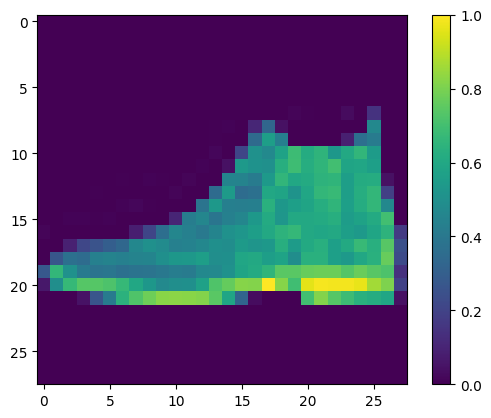

In [100]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

Vamos testar outra predição!!!

O modelo prêviu que a imagem 7 tem o rótulo 7 
O que corresponde a um  Sneaker


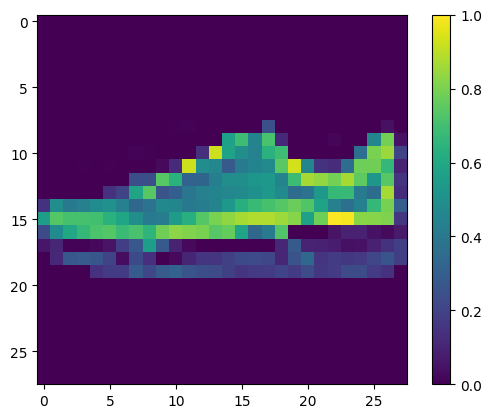

In [101]:
imagem = 9

print(f'O modelo prêviu que a imagem 7 tem o rótulo', np.argmax(predictions[imagem]), '\nO que corresponde a um ', class_names[np.argmax(predictions[imagem])])

plt.figure()
plt.imshow(test_images[imagem])
plt.colorbar()
plt.show()

Agora vamos criar uma função para apresentar o conjunto de 10 previsões de classe.

In [102]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Vamos verificar mais previsões

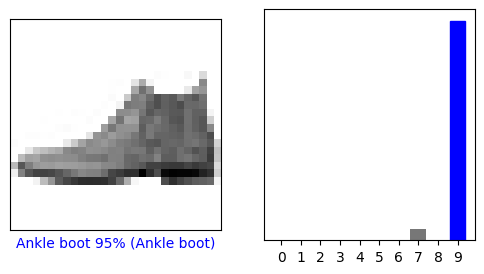

In [103]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

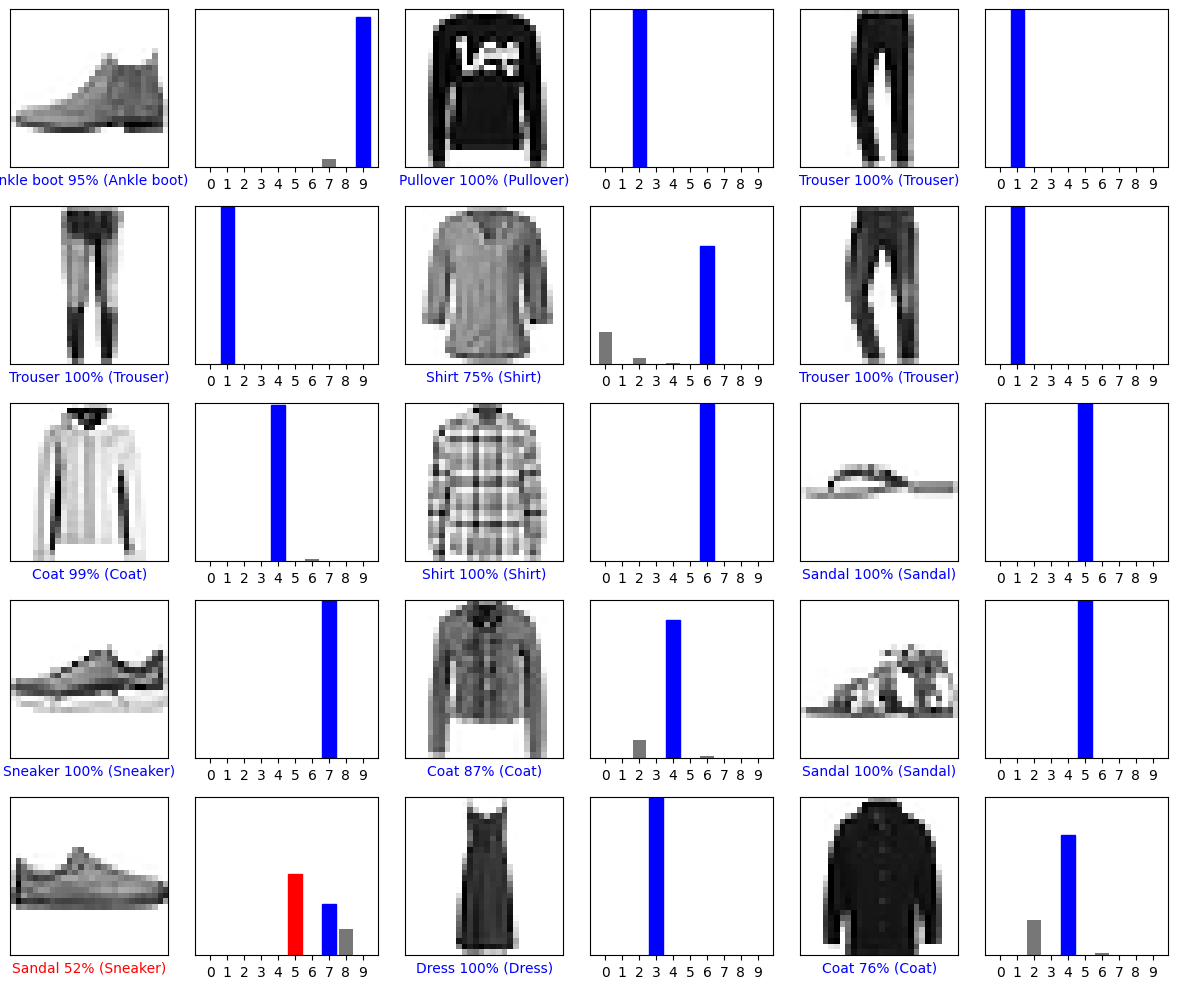

In [104]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Usar o modelo treinado

Por fim, use o modelo treinado para fazer uma previsão sobre uma única imagem.

In [105]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Os modelos do `tf.keras` são otimizados para fazer previsões para um *lote*, ou coleção, de exemplos ao mesmo tempo. 

Mesmo que você esteja usando uma única imagem, precisa adicioná-la a uma lista:

In [106]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora, faça a previsão do rótulo correto para essa imagem:

In [107]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1.4538836e-05 6.5015237e-16 9.9863619e-01 1.8416955e-18 1.3294854e-03
  5.3603160e-11 1.9757832e-05 1.4711151e-17 3.1010185e-14 2.2280782e-18]]


O `tf.keras.Model.predict` retorna uma lista de listas: uma lista para cada imagem no lote de dados. Obtenha as previsões para nossa única imagem no lote:

In [108]:
np.argmax(predictions_single[0])

2

[Para acessar o tutorial, clique aqui!](https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/classification.ipynb?hl=pt-br#scrollTo=m4VEw8Ud9Quh)

----------------------------------------------FIM--------------------------------------